In [1]:
from units import *
import matplotlib.pyplot as plt
from astrometry_sim import QuasarSim
import healpy as hp
from pylab import cm
from estimator_wholesky import get_vector_alm
from tqdm import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
nside = 128
nsim = 1
omega_pix = hp.nside2pixarea(nside)

noise_per_object = 1e-6
objects_per_area = 1e9*0.01
noise_times_area = noise_per_object/np.sqrt(objects_per_area)

max_sep = 180.
lmax = 3*nside - 1
npix = hp.nside2npix(nside)
mu_noise = noise_times_area/omega_pix

ell = np.arange(lmax)
C_ell_noise = mu_noise**2*omega_pix*np.ones(lmax)*(2*ell+1)

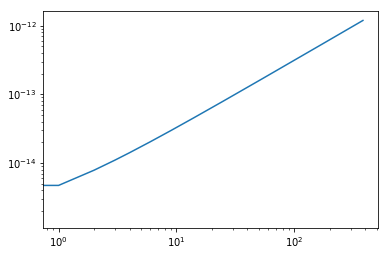

In [7]:
plt.plot(C_ell_noise)
plt.yscale("log")
plt.xscale("log")

In [ ]:
def likelihood():
    LL = -0.5*(x-mu)

In [81]:
nside = 128
nsim = 1
omega_pix = hp.nside2pixarea(nside)

noise_per_object = 1e-6
objects_per_area = 1e9*0.01
noise_times_area = noise_per_object/np.sqrt(objects_per_area)

max_sep = 180.
lmax = 3*nside - 1
npix = hp.nside2npix(nside)
mu_noise = noise_times_area/omega_pix
print(mu_noise)
noise_map = []
for i in range(nsim):
    noise_map.append([np.random.normal(scale=mu_noise, size=npix), np.random.normal(scale=mu_noise, size=npix)])
noise_map = np.array(noise_map)

4.947562866719493e-06


In [82]:
Cl_B_ary, Cl_C_ary, fB_ary, fC_ary = [],[],[],[]
for isim in tqdm_notebook(range(nsim)):
    Cl_B, Cl_C, fB, fC = get_vector_alm(noise_map[isim,0], noise_map[isim,1])
    Cl_B_ary.append(Cl_B)
    Cl_C_ary.append(Cl_C)
    fB_ary.append(fB)
    fC_ary.append(fC)

A Jupyter Widget

Text(0.5,0,'$\\ell$')

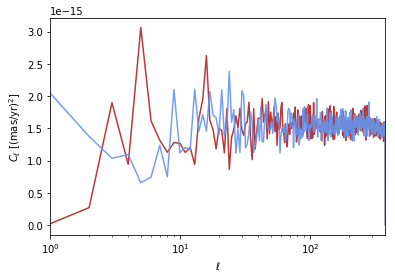

In [86]:
ell = np.arange(len(Cl_B_ary[0]))

# for isim in range(nsim):

#     plt.plot(ell, 1e6*Cl_B_ary[isim], color='cornflowerblue', alpha=0.9)
# #     plt.plot(ell, 1e6*Cl_C_ary[isim], label="$\Phi$-comp", color='firebrick', alpha=0.9)
# # plt.plot(ell, 1e6*Cl_tot[1:]*ell*(ell+1), label="Tot", color='grey', alpha=0.9)

plt.plot(ell, np.mean(Cl_B_ary, axis=0)/((2*ell+1)), color='firebrick', alpha=0.9)
plt.plot(ell, np.mean(Cl_C_ary, axis=0)/((2*ell+1)), color='cornflowerblue', alpha=0.9)

# plt.axhline(noise_times_area, ls='--', color='k')
# plt.axhline(mu_noise**2*omega_pix, ls='--', color='k')

# plt.legend()
plt.xlim((180/max_sep), lmax-5.)
# plt.ylim(0,1e-4)
plt.xscale("log")
# plt.yscale("log")

plt.ylabel("$C_\ell$ [(mas/yr)$^2$]")
plt.xlabel("$\ell$")

# plt.title("Expected signal, $10^{10}$ M$_\odot$ subhalo 10 kpc away")